In [3]:
import numpy as np

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 같은 shape인 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        # 중앙 차분(수치 미분)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

# 경사 하강법
# f: 최적화하려는 함수
# init_x: 초기 위치
# lr: 학습률
# step_num: 반복 횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x.copy()
    history = [x.copy()]  # 초기 위치 저장
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        history.append(x.copy())  # 각 단계의 x 저장
    
    return x, np.array(history)

[-6.11110793e-10  8.14814391e-10]


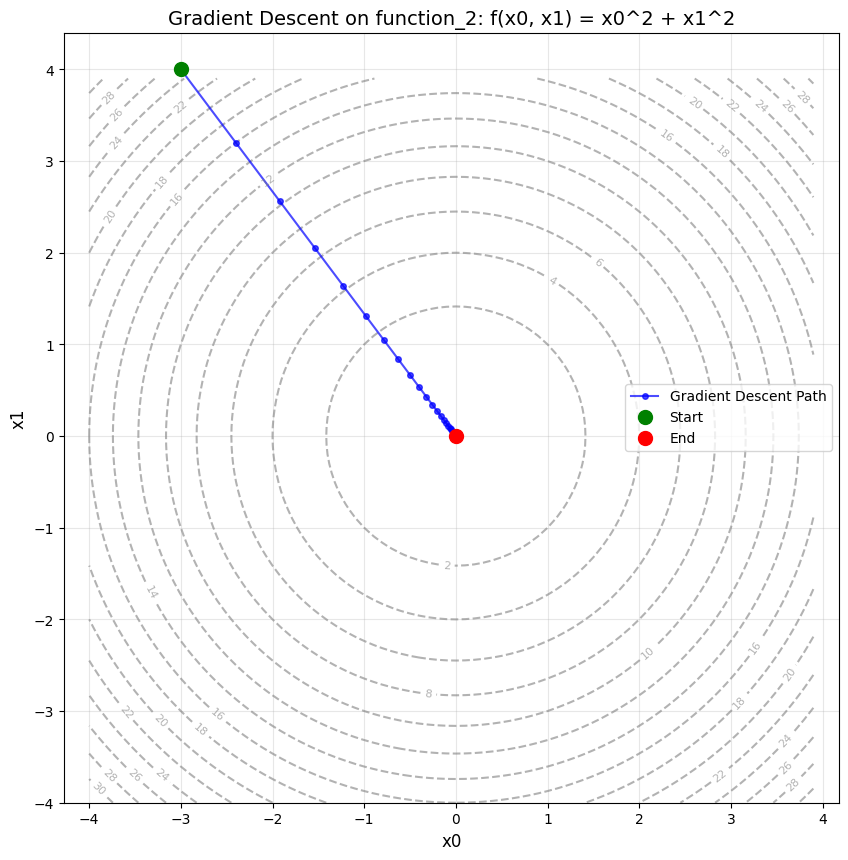

In [8]:
import matplotlib.pyplot as plt

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
new_x, history = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
print(new_x)

x0 = np.arange(-4.0, 4.0, 0.1)
x1 = np.arange(-4.0, 4.0, 0.1)
X, Y = np.meshgrid(x0, x1)
Z = function_2(np.array([X, Y]))

plt.figure(figsize=(10, 10))

# 점선 등고선 그리기
contour = plt.contour(X, Y, Z, levels=20, linestyles='dashed', colors='gray', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# x가 갱신되어 가는 과정을 점으로 표시
plt.plot(history[:, 0], history[:, 1], 'o-', color='blue', 
         markersize=4, linewidth=1.5, alpha=0.7, label='Gradient Descent Path')

# 시작점과 끝점 강조
plt.plot(history[0, 0], history[0, 1], 'o', color='green', markersize=10, label='Start', zorder=5)
plt.plot(history[-1, 0], history[-1, 1], 'o', color='red', markersize=10, label='End', zorder=5)

plt.xlabel('x0', fontsize=12)
plt.ylabel('x1', fontsize=12)
plt.title('Gradient Descent on function_2: f(x0, x1) = x0^2 + x1^2', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()